In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

from IPython.display import display
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz

In [39]:
nba_players = pd.read_csv('nba2021.csv')
print("nba_players.keys(): {}".format(nba_players.keys()))

nba_players.keys(): Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [40]:
import pandas as pd
df = pd.read_csv('nba2021.csv')
df=df.drop(columns=['Age','G','Tm','GS','FG','FGA','3P','2P','FTA','2PA','FT','FT'])

In [41]:
df.describe()

MP         FG%         3PA         3P%         2P%        eFG%  \
count  497.000000  497.000000  497.000000  497.000000  497.000000  497.000000   
mean    19.724547    0.437322    2.816097    0.300738    0.487899    0.506974   
std      9.892146    0.128347    2.332628    0.163417    0.156681    0.146480   
min      1.300000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.200000    0.389000    0.800000    0.250000    0.432000    0.468000   
50%     19.800000    0.443000    2.300000    0.337000    0.505000    0.525000   
75%     28.100000    0.500000    4.300000    0.396000    0.575000    0.576000   
max     38.300000    1.000000   11.800000    1.000000    1.000000    1.500000   

              FT%         ORB         DRB         TRB         AST         STL  \
count  497.000000  497.000000  497.000000  497.000000  497.000000  497.000000   
mean     0.692213    0.808451    2.826559    3.632797    2.035010    0.609658   
std      0.251333    0.769720    1.940002    2.519695    1.986807    0.427091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.619000    0.300000    1.300000    1.800000    0.700000    0.300000   
50%      0.759000    0.600000    2.600000    3.200000    1.400000    0.600000   
75%      0.848000    1.100000    3.800000    5.000000    2.700000    0.900000   
max      1.000000    4.600000    9.900000   14.000000   11.800000    2.000000   

              BLK         TOV          PF         PTS  
count  497.000000  497.000000  497.000000  497.000000  
mean     0.421932    1.139437    1.654728    8.962777  
std      0.439783    0.887715    0.844111    6.885621  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.100000    0.500000    1.000000    3.700000  
50%      0.300000    0.900000    1.700000    7.300000  
75%      0.600000    1.500000    2.200000   12.800000  
max      3.500000    5.000000    4.100000   32.800000

In [42]:
print("Shape of nba_players:{}".format(nba_players.shape))

Shape of nba_players:(497, 29)


In [43]:
class_column = 'Pos'

#The dataset contains attributes which we do not include as features. The reduced  dataset is shown below.
feature_columns = ['MP', 'FG%', '3P', '3PA', \
    '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', \
    'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

#Pandas DataFrame allows you to select columns.
#We use column selection to split the data into features and class.
nba_players_feature = nba_players[feature_columns]
nba_players_class = nba_players[class_column]

#splitting into training and test dataset
train_feature, test_feature, train_class, test_class = \
    train_test_split(nba_players_feature, nba_players_class, stratify=nba_players_class, \
    train_size=0.75, test_size=0.25,random_state=0)
print(train_feature)
training_accuracy = []
test_accuracy = []

       MP    FG%   3P  3PA    3P%    2P%   eFG%    FT%  ORB  DRB  TRB  AST  \
401  20.2  0.540  0.5  1.6  0.314  0.618  0.580  0.690  1.6  3.5  5.2  1.5   
31   33.7  0.428  1.0  3.4  0.304  0.466  0.463  0.742  1.3  4.9  6.2  3.1   
184  10.9  0.400  0.4  0.8  0.500  0.000  0.600  0.000  0.1  0.8  0.9  0.7   
111  13.8  0.438  1.3  3.3  0.384  0.509  0.547  0.900  0.3  1.4  1.6  0.9   
275  27.1  0.460  1.6  4.6  0.359  0.578  0.557  0.841  1.5  3.6  5.1  0.6   
..    ...    ...  ...  ...    ...    ...    ...    ...  ...  ...  ...  ...   
261  15.4  0.489  0.6  1.9  0.297  0.618  0.549  0.783  0.3  1.2  1.5  0.5   
341  10.5  0.429  1.3  2.3  0.556  0.200  0.607  0.333  0.3  0.8  1.0  0.8   
101   3.4  0.429  0.3  0.7  0.364  0.500  0.524  0.800  0.0  0.3  0.3  0.3   
418  19.0  0.377  1.6  4.5  0.347  0.455  0.503  0.879  0.2  1.3  1.5  1.3   
107  29.0  0.500  2.1  4.4  0.479  0.519  0.613  0.975  0.2  1.7  1.9  2.7   

     STL  BLK  TOV   PF   PTS  
401  0.7  0.6  1.0  2.5   8.5  

In [44]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='auto', metric='manhattan')
knn.fit(train_feature, train_class)
predictio = knn.predict(test_feature)
print("Test set predictions:\n{}".format(knn.predict(test_feature)))

Test set predictions:
['C' 'SF' 'SG' 'SG' 'C' 'C' 'SG' 'SG' 'SF' 'C' 'PF' 'SG' 'C' 'PF' 'SG'
 'PG' 'C' 'SG' 'SG' 'PG' 'SG' 'PF' 'C' 'SF' 'PG' 'SF' 'SF' 'C' 'SG' 'SG'
 'PG' 'SF' 'SF' 'SG' 'SF' 'SG' 'PG' 'PG' 'PG' 'SG' 'SF' 'SG' 'SG' 'SG'
 'SF' 'PF' 'PG' 'SG' 'SG' 'SG' 'SG' 'PF' 'PF' 'C' 'PF' 'SF' 'SG' 'PF' 'SG'
 'PG' 'C' 'PG' 'PF' 'C' 'SF' 'PG' 'SF' 'PG' 'C' 'C' 'C' 'PF' 'PF' 'SF'
 'SG' 'SF' 'PG' 'SF' 'PF' 'SF' 'C' 'PF' 'C' 'C' 'SF' 'PF' 'PG' 'SF' 'PF'
 'PF' 'C' 'SG' 'SF' 'C' 'PF' 'SG' 'PG' 'SF' 'SF' 'PF' 'C' 'SF' 'SG' 'PG'
 'PF' 'PG' 'PG' 'SF' 'PF' 'SF' 'SG' 'C' 'PG' 'PF' 'SG' 'SG' 'PF' 'SF' 'PF'
 'PF' 'SF' 'SG' 'PG' 'SG' 'SF']


In [45]:
print("Test set accuracy: {:.3f}".format(knn.score(test_feature,test_class)))

Test set accuracy: 0.400


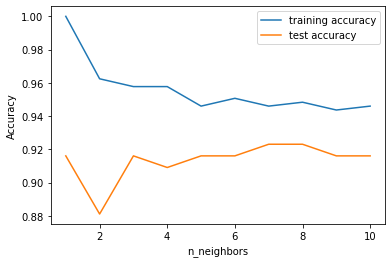

In [50]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_feature, train_class)
    # record training set accuracy
    training_accuracy.append(knn.score(train_feature, train_class))
    # record generalization accuracy
    test_accuracy.append(knn.score(test_feature, test_class))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

Training set score: 1.000
Test set score: 0.312


In [52]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

prediction = tree.predict(test_feature)
print("Confusion matrix:")
print(pd.crosstab(test_class, prediction, rownames=['True'], colnames=['Predicted'], margins=True))

Training set score: 0.988
Test set score: 0.951
Confusion matrix:
Predicted   0   1  All
True                  
0          49   4   53
1           3  87   90
All        52  91  143


In [49]:
cores = cross_val_score(knn, nba_players_feature, nba_players_class, cv=10)
print("Cross-validation scores: {}".format(cores))
print("Average cross-validation score: {:.2f}".format(cores.mean()))

Cross-validation scores: [0.48       0.48       0.42       0.36       0.48       0.38
 0.34       0.51020408 0.46938776 0.42857143]
Average cross-validation score: 0.43


In [ ]:
# accuracy changes on changing with the random  value .